In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
data = pd.read_csv('/content/sample_data/aco2.csv')

# Separate features and target variable
X = data.drop('num', axis=1)
y = data['num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Extra Trees Classifier
clf = ExtraTreesClassifier(n_estimators=80,max_depth=17, max_features=3, random_state=42 )

clf = ExtraTreesClassifier(random_state=42 )

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(clf.get_params())



Accuracy: 0.9855072463768116
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from time import time
from sklearn.metrics import accuracy_score


def GA_RF(ds, pop_size=10, selection_size=6, Pr=0.3, num_iter=40, max_count=7, runs=1):
    x_train, x_test, y_train, y_test = train_test_split(ds[:, :-1], ds[:, -1], test_size=0.2, random_state=42)
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
    n_features = x_train.shape[1]


    def acc(a):
        rf_tst_acc = np.zeros(a.shape[0])
        for i in range(a.shape[0]):
            rf = ExtraTreesClassifier(n_estimators=x[i, 0], max_depth=x[i, 1], max_features=x[i, 2], random_state=42)
            rf = rf.fit(x_train, y_train)
            y_pred = rf.predict(x_test)
            rf_tst_acc[i] = accuracy_score(y_test, y_pred)
            print(i+1, 'out of', a.shape[0], 'done')
        return rf_tst_acc

    best_acc = 0
    for run in range(runs):
        counter = 0
        x1 = np.random.choice(range(10, 101, 10), size=(pop_size, 1), replace=True)
        x2 = np.random.poisson(lam=int(14 + n_features/20), size=(pop_size, 1))
        x3 = np.random.poisson(lam=int(np.sqrt(n_features)), size=(pop_size, 1))
        x3[x3 > n_features] = n_features
        x3[x3 == 0] = 1
        x = np.concatenate((x1, x2, x3), axis=1)
        x_acc = acc(x)
        sorted_indices = np.argsort(x_acc)
        x = x[sorted_indices]
        x_acc = x_acc[sorted_indices]

        for itr in range(num_iter):
            fitness = x_acc - np.min(x_acc) + 0.01
            fitness = fitness / np.sum(fitness)
            selected_indices = np.random.choice(pop_size, size=selection_size, replace=True, p=fitness)
            parents = np.copy(x[selected_indices])
            rnd1 = np.random.choice(range(10, 101, 10), size=(selection_size, 1), replace=True)
            rnd2 = np.random.poisson(lam=int(14 + n_features/20), size=(selection_size, 1))
            rnd3 = np.random.poisson(lam=int(np.sqrt(n_features)), size=(selection_size, 1))
            rnd3[rnd3 > n_features] = n_features
            rnd3[rnd3 == 0] = 1
            randoms = np.concatenate((rnd1, rnd2, rnd3), axis=1)

            mask = np.random.choice([False, True], size=parents.shape, replace=True, p=[1-Pr, Pr])
            parents[mask] = randoms[mask]

            c0 = parents[:, 0].reshape(-1, 1)
            c1 = parents[:, 1].reshape(-1, 1)
            c2 = parents[:, 2].reshape(-1, 1)
            np.random.shuffle(c0)
            np.random.shuffle(c1)
            np.random.shuffle(c2)
            children = np.concatenate((c0, c1, c2), axis=1)
            x[:children.shape[0]] = children
            children_acc = acc(children)
            x_acc[:len(children_acc)] = children_acc
            sorted_indices = np.argsort(x_acc)
            x = x[sorted_indices]
            x_acc = x_acc[sorted_indices]

            counter += 1
            if(x_acc[-1] > best_acc):
                best = x[-1]
                best_acc = x_acc[-1]
                counter = 0

            if(counter >= max_count):
                break

    print('best:', best_acc, ', for n_estimators=%d, max_depth=%d, max_features=%d' % (best[0], best[1], best[2]), ', after', itr+1, 'iterations')


df = pd.read_csv('/content/sample_data/aco2.csv')
ds = df.values


t0 = time()
GA_RF(ds)
t1 = time()
print(t1-t0, '(s)')

(550, 10) (138, 10) (550,) (138,)
1 out of 10 done
2 out of 10 done
3 out of 10 done
4 out of 10 done
5 out of 10 done
6 out of 10 done
7 out of 10 done
8 out of 10 done
9 out of 10 done
10 out of 10 done
1 out of 6 done
2 out of 6 done
3 out of 6 done
4 out of 6 done
5 out of 6 done
6 out of 6 done
1 out of 6 done
2 out of 6 done
3 out of 6 done
4 out of 6 done
5 out of 6 done
6 out of 6 done
1 out of 6 done
2 out of 6 done
3 out of 6 done
4 out of 6 done
5 out of 6 done
6 out of 6 done
1 out of 6 done
2 out of 6 done
3 out of 6 done
4 out of 6 done
5 out of 6 done
6 out of 6 done
1 out of 6 done
2 out of 6 done
3 out of 6 done
4 out of 6 done
5 out of 6 done
6 out of 6 done
1 out of 6 done
2 out of 6 done
3 out of 6 done
4 out of 6 done
5 out of 6 done
6 out of 6 done
1 out of 6 done
2 out of 6 done
3 out of 6 done
4 out of 6 done
5 out of 6 done
6 out of 6 done
1 out of 6 done
2 out of 6 done
3 out of 6 done
4 out of 6 done
5 out of 6 done
6 out of 6 done
1 out of 6 done
2 out of 6 

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from time import time
from sklearn.metrics import accuracy_score


def GA_RF(ds, pop_size=10, selection_size=8, Pr=0.3, num_iter=50, max_count=10, runs=1):
    x_train, x_test, y_train, y_test = train_test_split(ds[:, :-1], ds[:, -1], test_size=0.2, random_state=42)
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
    n_features = x_train.shape[1]


    def acc(a):
        rf_tst_acc = np.zeros(a.shape[0])
        for i in range(a.shape[0]):
            rf = ExtraTreesClassifier(n_estimators=x[i, 0], max_depth=x[i, 1], max_features=x[i, 2], random_state=42)
            rf = rf.fit(x_train, y_train)
            y_pred = rf.predict(x_test)
            rf_tst_acc[i] = accuracy_score(y_test, y_pred)
            print(i+1, 'out of', a.shape[0], 'done')
        return rf_tst_acc

    best_acc = 0
    for run in range(runs):
        counter = 0
        x1 = np.random.choice(range(10, 101, 10), size=(pop_size, 1), replace=True)
        x2 = np.random.poisson(lam=int(14 + n_features/20), size=(pop_size, 1))
        x3 = np.random.poisson(lam=int(np.sqrt(n_features)), size=(pop_size, 1))
        x3[x3 > n_features] = n_features
        x3[x3 == 0] = 1
        x = np.concatenate((x1, x2, x3), axis=1)
        x_acc = acc(x)
        sorted_indices = np.argsort(x_acc)
        x = x[sorted_indices]
        x_acc = x_acc[sorted_indices]

        for itr in range(num_iter):
            fitness = x_acc - np.min(x_acc) + 0.01  #
            fitness = fitness / np.sum(fitness)  # so that every value is between 0 and 1 and the sum of all is 1
            # selection
            selected_indices = np.random.choice(pop_size, size=selection_size, replace=True, p=fitness)
            # mutation
            parents = np.copy(x[selected_indices])
            rnd1 = np.random.choice(range(10, 101, 10), size=(selection_size, 1), replace=True)
            rnd2 = np.random.poisson(lam=int(14 + n_features/20), size=(selection_size, 1))
            rnd3 = np.random.poisson(lam=int(np.sqrt(n_features)), size=(selection_size, 1))
            rnd3[rnd3 > n_features] = n_features
            rnd3[rnd3 == 0] = 1
            randoms = np.concatenate((rnd1, rnd2, rnd3), axis=1)
            # we want mutation to happen with a probability, not always. so, we will choose between the old value and
            # the new one according to that probability.
            mask = np.random.choice([False, True], size=parents.shape, replace=True, p=[1-Pr, Pr])
            parents[mask] = randoms[mask]
            # cross over
            c0 = parents[:, 0].reshape(-1, 1)
            c1 = parents[:, 1].reshape(-1, 1)
            c2 = parents[:, 2].reshape(-1, 1)
            np.random.shuffle(c0)
            np.random.shuffle(c1)
            np.random.shuffle(c2)
            children = np.concatenate((c0, c1, c2), axis=1)
            x[:children.shape[0]] = children
            children_acc = acc(children)
            x_acc[:len(children_acc)] = children_acc
            sorted_indices = np.argsort(x_acc)
            x = x[sorted_indices]
            x_acc = x_acc[sorted_indices]

            counter += 1
            if(x_acc[-1] > best_acc):
                best = x[-1]
                best_acc = x_acc[-1]
                counter = 0

            if(counter >= max_count):
                break

    print('best:', best_acc, ', for n_estimators=%d, max_depth=%d, max_features=%d' % (best[0], best[1], best[2]), ', after', itr+1, 'iterations')


df = pd.read_csv('/content/sample_data/aco2.csv')
ds = df.values


t0 = time()
GA_RF(ds)
t1 = time()
print(t1-t0, '(s)')

(550, 10) (138, 10) (550,) (138,)
1 out of 10 done
2 out of 10 done
3 out of 10 done
4 out of 10 done
5 out of 10 done
6 out of 10 done
7 out of 10 done
8 out of 10 done
9 out of 10 done
10 out of 10 done
1 out of 8 done
2 out of 8 done
3 out of 8 done
4 out of 8 done
5 out of 8 done
6 out of 8 done
7 out of 8 done
8 out of 8 done
1 out of 8 done
2 out of 8 done
3 out of 8 done
4 out of 8 done
5 out of 8 done
6 out of 8 done
7 out of 8 done
8 out of 8 done
1 out of 8 done
2 out of 8 done
3 out of 8 done
4 out of 8 done
5 out of 8 done
6 out of 8 done
7 out of 8 done
8 out of 8 done
1 out of 8 done
2 out of 8 done
3 out of 8 done
4 out of 8 done
5 out of 8 done
6 out of 8 done
7 out of 8 done
8 out of 8 done
1 out of 8 done
2 out of 8 done
3 out of 8 done
4 out of 8 done
5 out of 8 done
6 out of 8 done
7 out of 8 done
8 out of 8 done
1 out of 8 done
2 out of 8 done
3 out of 8 done
4 out of 8 done
5 out of 8 done
6 out of 8 done
7 out of 8 done
8 out of 8 done
1 out of 8 done
2 out of 8 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

data = pd.read_csv('/content/sample_data/acorf.csv')

# Separate features and target variable
X = data.drop('num', axis=1)
y = data['num']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
data = pd.read_csv('/content/sample_data/aco2.csv')

# Separate features and target variable
X = data.drop('num', axis=1)
y = data['num']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Extra Trees Classifier
et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_classifier.fit(X_train, y_train)
et_predictions = et_classifier.predict(X_test)

data = pd.read_csv('/content/sample_data/acoxg.csv')

# Separate features and target variable
X = data.drop('num', axis=1)
y = data['num']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train XGBoost Classifier
model = xgb.XGBClassifier(objective='multi:softmax', num_class=5)
model.fit(X_train, y_train)

# Make predictions on the test set


xgb_predictions = model.predict(X_test)

# Print classification reports
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

print("\nExtra Trees Classification Report:")
print(classification_report(y_test, et_predictions))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

# Calculate testing accuracies
rf_accuracy = accuracy_score(y_test, rf_predictions)
et_accuracy = accuracy_score(y_test, et_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

print("\nTesting Accuracies:")
print("Random Forest Accuracy:", rf_accuracy)
print("Extra Trees Accuracy:", et_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.96      0.83      0.89        30
           2       0.96      0.96      0.96        28
           3       0.86      0.96      0.91        25
           4       0.97      1.00      0.99        38

    accuracy                           0.94       138
   macro avg       0.94      0.94      0.94       138
weighted avg       0.94      0.94      0.94       138


Extra Trees Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       1.00      0.97      0.98        30
           2       0.97      1.00      0.98        28
           3       0.96      1.00      0.98        25
           4       1.00      1.00      1.00        38

    accuracy                           0.99       138
   macro avg       0.99      0.98      0.98       138
weig

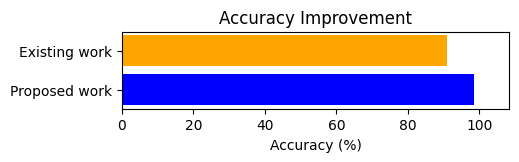

In [ ]:
import matplotlib.pyplot as plt

# Data
# deployment = ['Edge', 'Cloud']
# latency = [0.001358, 0.012269]
deployment = ['Proposed work', 'Existing work']
latency = [98.55, 90.86]


# Plotting
plt.figure(figsize=(5, 1))
plt.barh(deployment, latency, color=['blue', 'orange'])

# plt.xlabel('Deployment')
# plt.ylabel('Latency (s)')
# plt.title('Latency')
# plt.xlabel('Deployment')
plt.xlabel('Accuracy (%)')
plt.title('Accuracy Improvement')
plt.xlim(0, max(latency) * 1.1)

# Display the plot
plt.show()


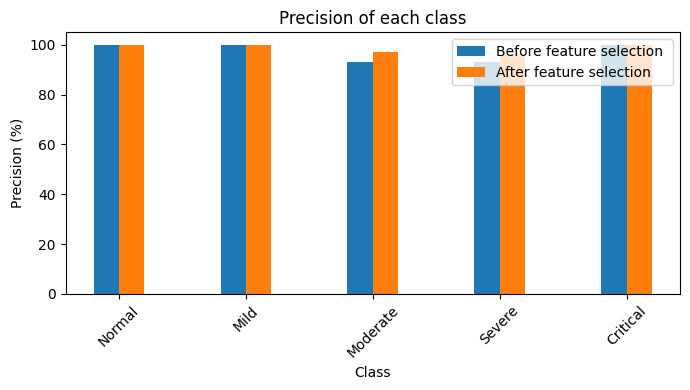

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the first model
# model1_accuracy = [90.86]
# model1_recall = [94, 93, 96, 100, 100]
model1_precision = [100, 100, 93, 93, 100]
# model1_f1_score = [0.88, 0.84, 0.97, 0.90, 0.98]

# Data for the second model
# model2_accuracy = [98.55, 97, 100, 100, 100]
# model2_recall = [94, 97, 100, 100, 100]
model2_precision = [100, 100, 97, 96, 100]
# model2_f1_score = [0.97, 0.98, 0.98, 0.98, 1.00]

# Categories (class labels)
classes = ['Normal', 'Mild', 'Moderate', 'Severe', 'Critical']

# Bar width
bar_width = 0.2

# X-axis positions for the bars
x = np.arange(len(classes))

# Plotting
fig, ax = plt.subplots(figsize=(7, 4))

# Bar for model 1
bars1 = ax.bar(x - bar_width/2, model1_precision, bar_width, label='Before feature selection ')
bars2 = ax.bar(x + bar_width/2, model2_precision, bar_width, label='After feature selection')

# Adding labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Precision (%)')
ax.set_title('Precision of each class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


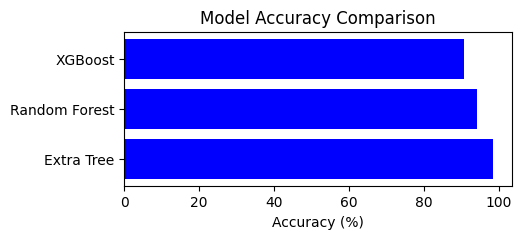

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['Extra Tree','Random Forest','XGBoost']
accuracy = [ 98.55, 94.2, 90.57]

# Plotting
plt.figure(figsize=(5, 2))  # Adjust the figure size as needed
plt.barh(models, accuracy, color='blue')

# Add labels and title
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

# Display the plot
plt.show()
